In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading and Understanding the data

In [2]:
# Lets read the dataset
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Lets the check the basic details of the data set
#Columns
print(data.columns)
#Shape
print("Shape : "+str(data.shape))

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Shape : (730, 16)


In [4]:
#Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observation : From the above results we see that the dataset has 16 attributes and 730 rows. We see that there are no missing values and the data types are float, int and object.

In [6]:
# Lets split dteday column into date, month and year
data['dteday'] =  pd.to_datetime(data['dteday'],format='%d-%m-%Y')
data['dteday'].dtype

dtype('<M8[ns]')

In [7]:
data['year'] = pd.DatetimeIndex(data['dteday']).year
data['month'] = pd.DatetimeIndex(data['dteday']).month
data['date'] = pd.DatetimeIndex(data['dteday']).month

In [8]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,date
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1,1


In [9]:
# Since we have split the dteday column into date, month and year we can drop the columns dteday, yr and mnth

data.drop(['yr','mnth','dteday'],axis=1,inplace=True)

In [10]:
data.head()

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,date
0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1,1
1,2,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1,1
2,3,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1,1
3,4,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1,1
4,5,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1,1


In [11]:
# After refering the data dictionary we can safely drop the column instant(record index), casual and registered

data.drop(['instant'],axis=1,inplace=True)
data.drop(['casual'],axis=1,inplace=True)
data.drop(['registered'],axis=1,inplace=True)

In [12]:
# Lets handle the categorical variable season
# season (1:spring, 2:summer, 3:fall, 4:winter)

data['season'] = data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
data.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,date
0,spring,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1,1
1,spring,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1,1
2,spring,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1,1
3,spring,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1,1
4,spring,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1,1


In [13]:
data.holiday.unique()

array([0, 1], dtype=int64)

In [14]:
data.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [15]:
# Lets handle the categorical variable weekday
# weekday (0:'tuesday', 1:'wednesday', 2:'thursday', 3:'friday', 4:'saturday', 5:'sunday', 6:'monday')

data['weekday'] = data['weekday'].map({0:'tuesday', 1:'wednesday', 2:'thursday', 3:'friday', 4:'saturday', 5:'sunday', 6:'monday'})
data.head(10)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,date
0,spring,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1,1
1,spring,0,tuesday,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1,1
2,spring,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1,1
3,spring,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1,1
4,spring,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1,1
5,spring,0,saturday,1,1,8.378268,11.66045,51.8261,6.000868,1606,2018,1,1
6,spring,0,sunday,1,2,8.057402,10.44195,49.8696,11.304642,1510,2018,1,1
7,spring,0,monday,0,2,6.765000,8.11270,53.5833,17.875868,959,2018,1,1
8,spring,0,tuesday,0,1,5.671653,5.80875,43.4167,24.250650,822,2018,1,1
9,spring,0,wednesday,1,1,6.184153,7.54440,48.2917,14.958889,1321,2018,1,1


#### Note: There seem to be some descripencies in  the dataset. The date 01-01-2018 has weekday as sunday, monday, tuesday, wednesday, thursaday, friday, saturday. After discussion with the instructor  the following has been considered for the weekday column(0:'tuesday', 1:'wednesday', 2:'thursday', 3:'friday', 4:'saturday', 5:'sunday', 6:'monday') 

In [16]:
data.workingday.unique()

array([0, 1], dtype=int64)

In [17]:
data.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [18]:
#Lets handle the categorical variable weathersit
data['weathersit'].replace({1:"Clear_Few_Clouds",2:"Misty_Cloudy",3:"Light_RainANDSnow_Thunderstorm",4:'Heavy_RainANDIce_Pallets'},inplace=True)
data.head(10)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,date
0,spring,0,monday,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1,1
1,spring,0,tuesday,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1,1
2,spring,0,wednesday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349,2018,1,1
3,spring,0,thursday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562,2018,1,1
4,spring,0,friday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600,2018,1,1
5,spring,0,saturday,1,Clear_Few_Clouds,8.378268,11.66045,51.8261,6.000868,1606,2018,1,1
6,spring,0,sunday,1,Misty_Cloudy,8.057402,10.44195,49.8696,11.304642,1510,2018,1,1
7,spring,0,monday,0,Misty_Cloudy,6.765000,8.11270,53.5833,17.875868,959,2018,1,1
8,spring,0,tuesday,0,Clear_Few_Clouds,5.671653,5.80875,43.4167,24.250650,822,2018,1,1
9,spring,0,wednesday,1,Clear_Few_Clouds,6.184153,7.54440,48.2917,14.958889,1321,2018,1,1


### Visualizing the data

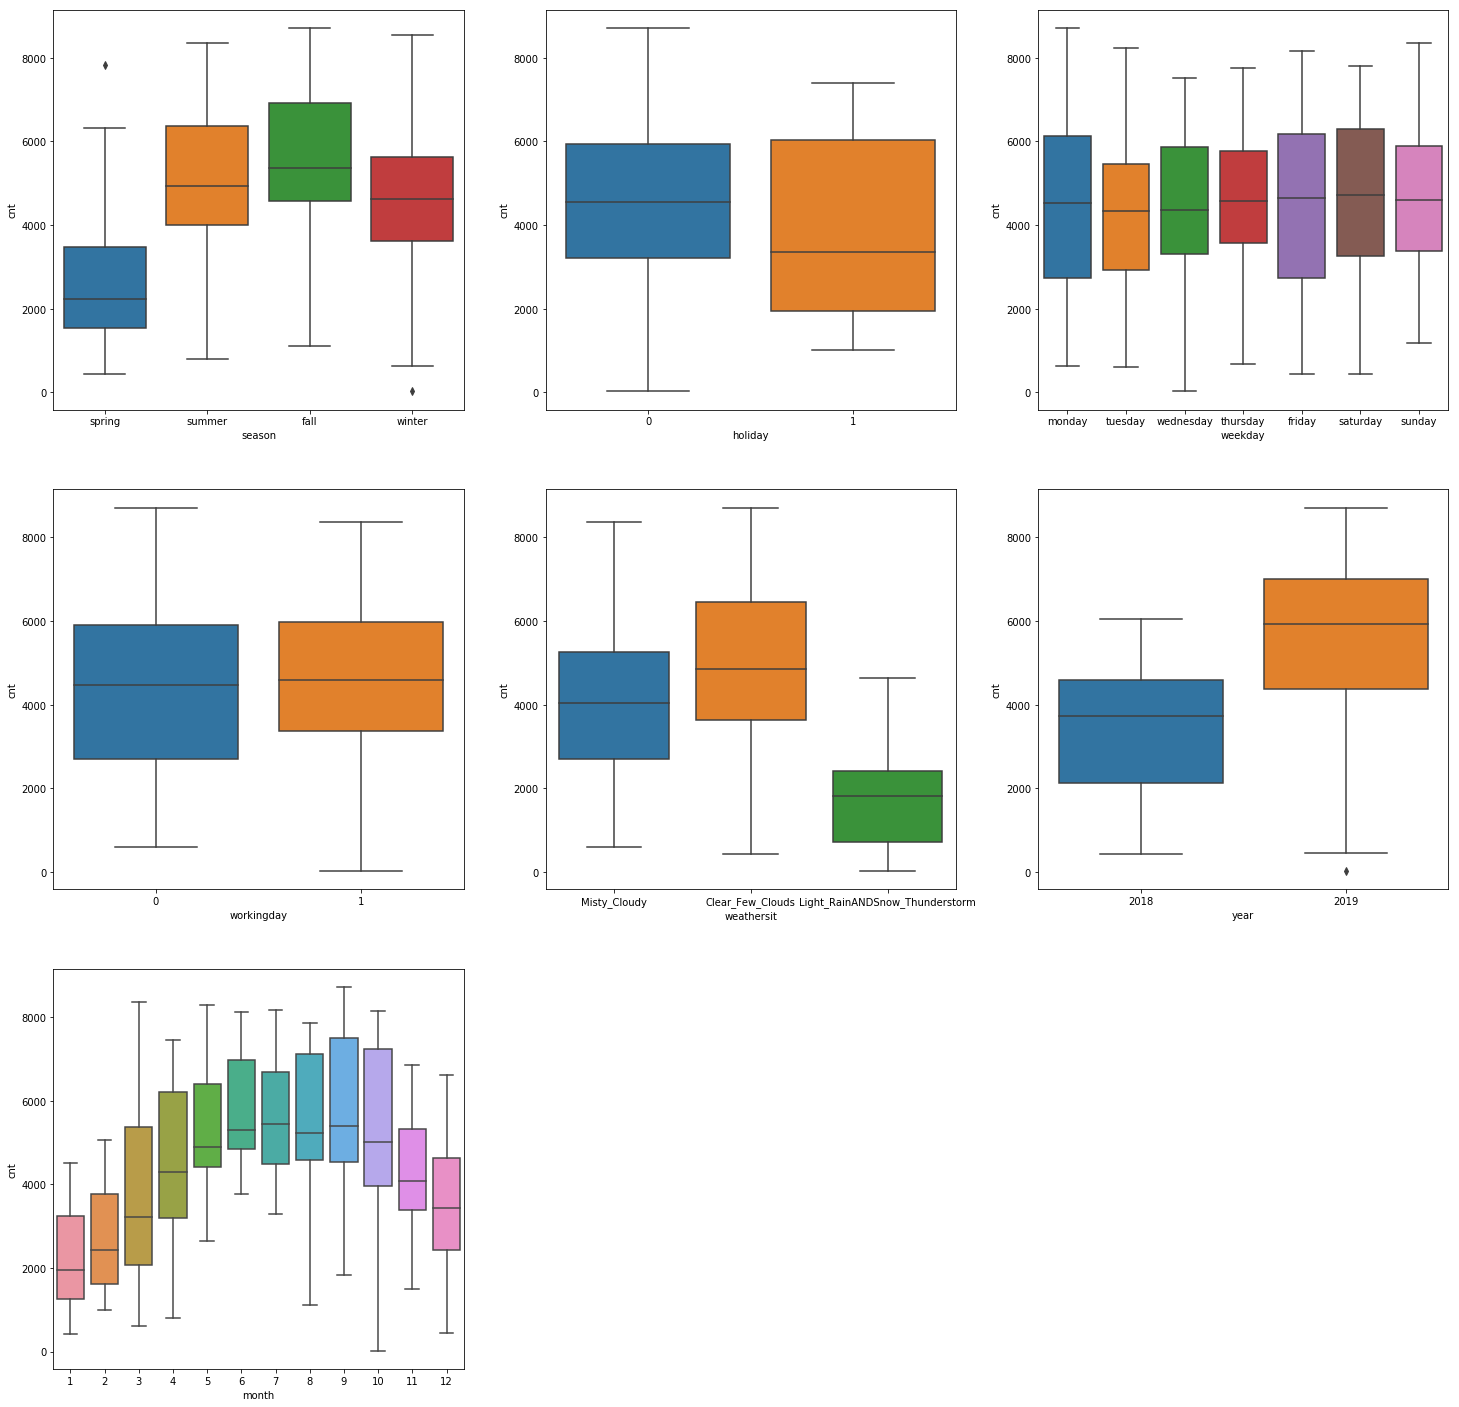

In [19]:
#Lets visualize the categorical varibles

plt.figure(figsize=(25, 25))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'month', y = 'cnt', data = data)

plt.show()

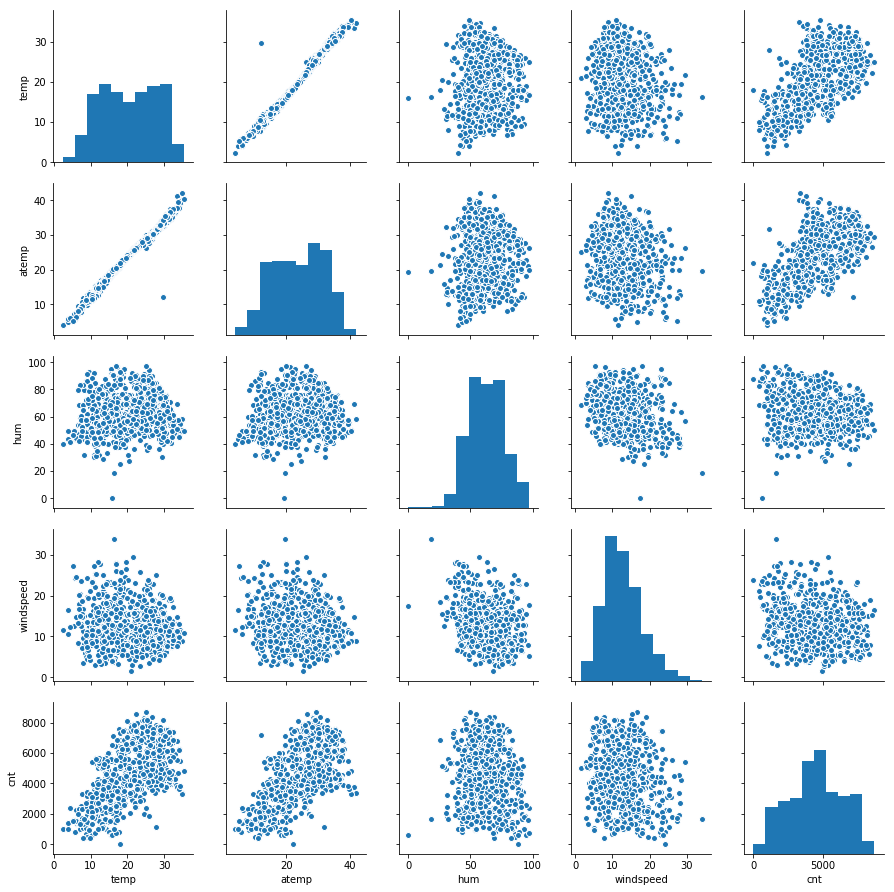

In [20]:
#Lets visualize the numeric variables

sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

#### Observation: From the above plots, there seem to be a correlation between columns atem and temp. Lets verify this further.

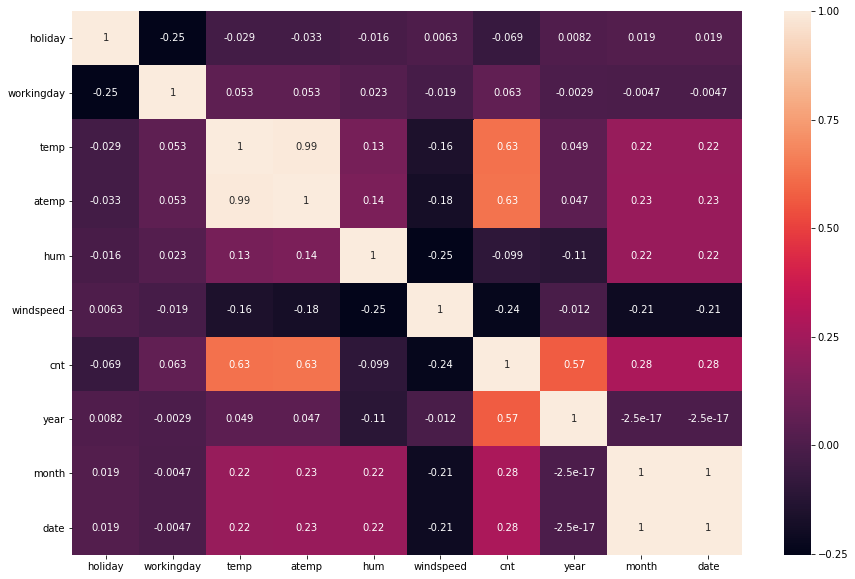

In [21]:
#Lets check the correlations using a heatmap

plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()

#### Observation:  From the above heatmap, its pretty evident that the correlation between atem and temp is very high --> 0.99. Therefore lets drop the column temp and keep only atemp for our model. 

In [22]:
#Dropping column temp

data.drop(['temp'],axis=1,inplace=True)

In [23]:
data.head()

,season,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,year,month,date
0,spring,0,monday,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,2018,1,1
1,spring,0,tuesday,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,2018,1,1
2,spring,0,wednesday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349,2018,1,1
3,spring,0,thursday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562,2018,1,1
4,spring,0,friday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600,2018,1,1


### 2. Preparing the data

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
year          730 non-null int64
month         730 non-null int64
date          730 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 68.5+ KB


In [25]:
#Lets encode the categorical variables
varList = ['season','weekday','weathersit','month']
data['month']=data['month'].astype(object)

In [26]:
#Lets create dummy variables for the above categorical varibales

#season
Season=pd.get_dummies(data['season'],drop_first=True)

In [27]:
#weekday
WeekDay=pd.get_dummies(data['weekday'],drop_first=True)

In [28]:
#weathersit
Weather=pd.get_dummies(data['weathersit'],drop_first=True)

In [29]:
#month
Month=pd.get_dummies(data['month'],drop_first=True)

In [30]:
#year
Year=pd.get_dummies(data['year'],drop_first=True)

In [31]:
#Lets concat the dummies to the original dataframe

data=pd.concat([data,Season],axis=1)
data=pd.concat([data,WeekDay],axis=1)
data=pd.concat([data,Weather],axis=1)
data=pd.concat([data,Month],axis=1)
data=pd.concat([data,Year],axis=1)

In [32]:
data.head()

,season,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,year,...,4,5,6,7,8,9,10,11,12,2019
0,spring,0,monday,0,Misty_Cloudy,18.18125,80.5833,10.749882,985,2018,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,tuesday,0,Misty_Cloudy,17.68695,69.6087,16.652113,801,2018,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,wednesday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349,2018,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,thursday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562,2018,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,friday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600,2018,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Now since the original categorical columns are encoded lets frop these original columns

data.drop(['season'],axis=1,inplace=True)
data.drop(['weekday'],axis=1,inplace=True)
data.drop(['weathersit'],axis=1,inplace=True)
data.drop(['month'],axis=1,inplace=True)
data.drop(['year'],axis=1,inplace=True)

In [34]:
data.head()

,holiday,workingday,atemp,hum,windspeed,cnt,date,spring,summer,winter,...,4,5,6,7,8,9,10,11,12,2019
0,0,0,18.18125,80.5833,10.749882,985,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Lets split the data into train and test set

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
print("Shape of train set :"+str(df_train.shape))
print("Shape of test set :"+str(df_test.shape))

Shape of train set :(510, 30)
Shape of test set :(219, 30)


In [37]:
#Rescaling features

from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
scaler=MinMaxScaler()

#Create list of numeric varibales
num_vars = ['atemp','hum','windspeed','cnt']

#Fit scaler on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

D:\Deepika\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Deepika\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
df_train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,date,spring,summer,winter,...,4,5,6,7,8,9,10,11,12,2019
653,0,1,0.501133,0.575354,0.300794,0.864243,10,0,0,1,...,0,0,0,0,0,0,1,0,0,1
576,0,1,0.766351,0.725633,0.264686,0.827658,7,0,0,0,...,0,0,0,1,0,0,0,0,0,1
426,0,0,0.438975,0.640189,0.255342,0.465255,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,0,0,0.200348,0.498067,0.663106,0.204096,12,1,0,0,...,0,0,0,0,0,0,0,0,1,1
482,0,0,0.391735,0.504508,0.188475,0.482973,4,0,1,0,...,1,0,0,0,0,0,0,0,0,1


### 3. Training the model - Linear Regression model using mixed approach

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
X_train.head()

,holiday,workingday,atemp,hum,windspeed,date,spring,summer,winter,monday,...,4,5,6,7,8,9,10,11,12,2019
653,0,1,0.501133,0.575354,0.300794,10,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
576,0,1,0.766351,0.725633,0.264686,7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
426,0,0,0.438975,0.640189,0.255342,3,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
728,0,0,0.200348,0.498067,0.663106,12,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
482,0,0,0.391735,0.504508,0.188475,4,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [41]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [42]:
# Variable selection using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
#Running RFE with output number of variable as 15

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('date', False, 12),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('monday', True, 1),
 ('saturday', False, 13),
 ('sunday', False, 11),
 ('thursday', False, 8),
 ('tuesday', True, 1),
 ('wednesday', False, 9),
 ('Light_RainANDSnow_Thunderstorm', True, 1),
 ('Misty_Cloudy', True, 1),
 (2, False, 7),
 (3, False, 4),
 (4, False, 3),
 (5, True, 1),
 (6, False, 2),
 (7, False, 15),
 (8, True, 1),
 (9, True, 1),
 (10, False, 14),
 (11, False, 5),
 (12, False, 6),
 (2019, True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index([                       'holiday',                     'workingday',
                                'atemp',                            'hum',
                            'windspeed',                         'spring',
                               'winter',                         'monday',
                              'tuesday', 'Light_RainANDSnow_Thunderstorm',
                         'Misty_Cloudy',                                5,
                                      8,                                9,
                                   2019],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index([     'date',    'summer',  'saturday',    'sunday',  'thursday',
       'wednesday',           2,           3,           4,           6,
                 7,          10,          11,          12],
      dtype='object')

In [46]:
#Lets build a model using statsmodels

import statsmodels.api as sm  

#Creating df with RFE selected varibales
X_train_rfe = X_train[col]

#Adding a constant variable
X_train_rfe_1 = sm.add_constant(X_train_rfe)

In [47]:
lm_1 = sm.OLS(y_train,X_train_rfe_1).fit()

In [48]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.06e-186
Time:                        18:59:11   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2491      0.026      9.727      0.000       0.199       0.299
holiday                           -0.0019      0.022     -0.090      0.928      -0.044       0.041
workingday                         0.0952      0.009     10.096      0.000       0.077       0.114
atemp                              0.4474      0.031     14.286      0.000       0.386       0.509
hum                               -0.1549      0.039     -4.002      0.000      -0.231      -0.079
windspeed                         -0.1468      0.026     -5.659      0.000      -0.198      -0.096
spring                            -0.1048      0.015     -6.819      0.000      -0.135      -0.075
winter                             0.0643      0.013      4.951      0.000       0.039       0.090
monday                             0.1051      0.012      9.077      0.000       0.082       0.128
tuesday                            0.0508      0.012      4.163      0.000       0.027       0.075
Light_RainANDSnow_Thunderstorm    -0.2447      0.027     -9.108      0.000      -0.298      -0.192
Misty_Cloudy                      -0.0594      0.011     -5.546      0.000      -0.080      -0.038
5                                  0.0528      0.016      3.235      0.001       0.021       0.085
8                                  0.0209      0.016      1.329      0.185      -0.010       0.052
9                                  0.0861      0.016      5.351      0.000       0.054       0.118
2019                               0.2336      0.008     28.414      0.000       0.217       0.250
==============================================================================
Omnibus:                       70.589   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.199
Skew:                          -0.639   Prob(JB):                     4.16e-48
Kurtosis:                       5.939   Cond. No.                     1.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Observation: Since 'holiday' has the highest p-Value (0.928), it may be insignificant in the presence of other variables. Lets drop it.

In [49]:
#Dropping column holiday
X_train_rfe = X_train_rfe.drop(['holiday'],axis=1)

In [50]:
#Now lets rebuild the model without holiday column

#Adding a constant variable
X_train_rfe_1 = sm.add_constant(X_train_rfe)

lm_2 = sm.OLS(y_train,X_train_rfe_1).fit()

lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.06e-186
Time:                        18:59:11   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2471      0.040      6.126      0.000       0.168       0.326
workingday                         0.0971      0.026      3.724      0.000       0.046       0.148
atemp                              0.4474      0.031     14.286      0.000       0.386       0.509
hum                               -0.1549      0.039     -4.002      0.000      -0.231      -0.079
windspeed                         -0.1468      0.026     -5.659      0.000      -0.198      -0.096
spring                            -0.1048      0.015     -6.819      0.000      -0.135      -0.075
winter                             0.0643      0.013      4.951      0.000       0.039       0.090
monday                             0.1070      0.028      3.885      0.000       0.053       0.161
tuesday                            0.0527      0.028      1.904      0.058      -0.002       0.107
Light_RainANDSnow_Thunderstorm    -0.2447      0.027     -9.108      0.000      -0.298      -0.192
Misty_Cloudy                      -0.0594      0.011     -5.546      0.000      -0.080      -0.038
5                                  0.0528      0.016      3.235      0.001       0.021       0.085
8                                  0.0209      0.016      1.329      0.185      -0.010       0.052
9                                  0.0861      0.016      5.351      0.000       0.054       0.118
2019                               0.2336      0.008     28.414      0.000       0.217       0.250
==============================================================================
Omnibus:                       70.589   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.199
Skew:                          -0.639   Prob(JB):                     4.16e-48
Kurtosis:                       5.939   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Lets calulate the vif for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,30.05
0,workingday,17.01
1,atemp,15.88
6,monday,4.58
3,windspeed,4.49
7,tuesday,4.47
4,spring,2.96
5,winter,2.37
9,Misty_Cloudy,2.28
13,2019,2.07


In [52]:
#Since hum has a high vif lets drop it
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [53]:
X_train_rfe_2 = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe_2).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.46e-183
Time:                        18:59:12   Log-Likelihood:                 495.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     496   BIC:                            -904.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [54]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,13.44
1,atemp,11.73
2,windspeed,4.47
5,monday,3.82
6,tuesday,3.62
3,spring,2.54
12,2019,2.06
4,winter,1.91
8,Misty_Cloudy,1.59
10,8,1.44


In [55]:
#Since workingday has a high vif lets drop it
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [56]:
X_train_rfe_3 = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_rfe_3).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.99e-182
Time:                        18:59:12   Log-Likelihood:                 488.78
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     497   BIC:                            -896.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,4.84
1,windspeed,3.94
11,2019,2.05
2,spring,1.71
7,Misty_Cloudy,1.53
3,winter,1.51
9,8,1.44
8,5,1.29
10,9,1.25
4,monday,1.22


#### Observation: Wee see that the month 8 has a very high p-value, so lets drop that column

In [58]:
#Since month 8 has a high vif lets drop it
X_train_rfe=X_train_rfe.drop([8],axis=1)

In [59]:
X_train_rfe_4 = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train,X_train_rfe_4).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.15e-182
Time:                        18:59:12   Log-Likelihood:                 488.10
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     498   BIC:                            -901.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Observation: Looking at the p-values we see that monday has a very high p-value and can be dropped

In [60]:
#Since monday has a high vif lets drop it
X_train_rfe=X_train_rfe.drop(['monday'],axis=1)

In [61]:
X_train_rfe_5 = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train,X_train_rfe_5).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     240.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.71e-183
Time:                        18:59:12   Log-Likelihood:                 487.21
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     499   BIC:                            -905.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [62]:
#Lets check the vif for the above model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,3.93
1,windspeed,3.87
9,2019,2.05
2,spring,1.67
6,Misty_Cloudy,1.52
3,winter,1.42
7,5,1.21
8,9,1.18
4,tuesday,1.17
5,Light_RainANDSnow_Thunderstorm,1.08


#### Observation: The above model seem to have a good result. Lets keep the above model and proceed to validate the assumptions of  Linear Regression

#### Common heuristics for vif:
* \>10-High Vif, should be eliminated
* \>5-Considered ok, but needs inspecting
* <5-Good vif, no nned to eliminate


In [63]:
X_train_rfe.head()

,atemp,windspeed,spring,winter,tuesday,Light_RainANDSnow_Thunderstorm,Misty_Cloudy,5,9,2019
653,0.501133,0.300794,0,1,0,0,0,0,0,1
576,0.766351,0.264686,0,0,0,0,0,0,0,1
426,0.438975,0.255342,1,0,0,0,1,0,0,1
728,0.200348,0.663106,1,0,1,0,0,0,0,1
482,0.391735,0.188475,0,0,0,0,1,0,0,1


In [64]:
#Predict values
y_train_cnt = lm_6.predict(X_train_rfe_5)

In [65]:
#lets get the residuals

res=y_train - y_train_cnt

D:\Deepika\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

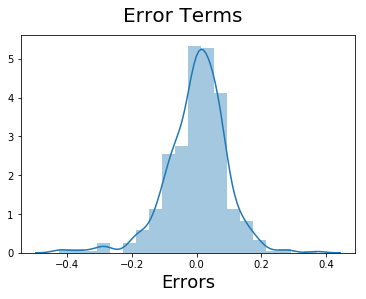

In [66]:
#Checking for normality of error terms
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

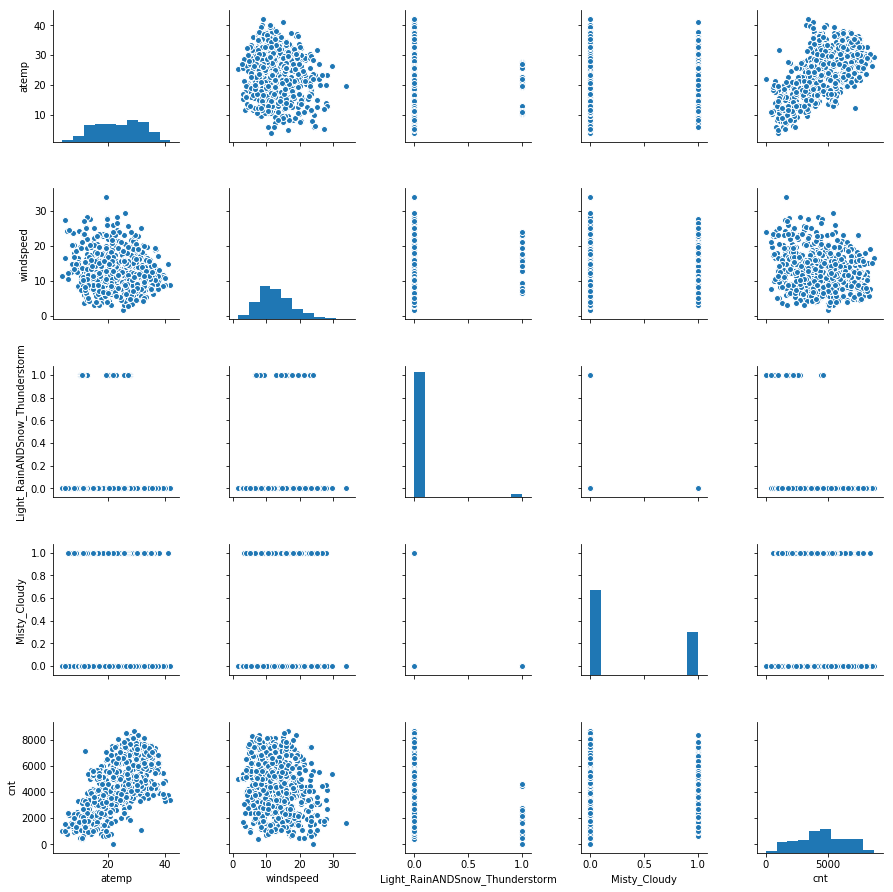

In [67]:
sns.pairplot(data, vars=['atemp','windspeed','Light_RainANDSnow_Thunderstorm','Misty_Cloudy',"cnt"])
plt.show()

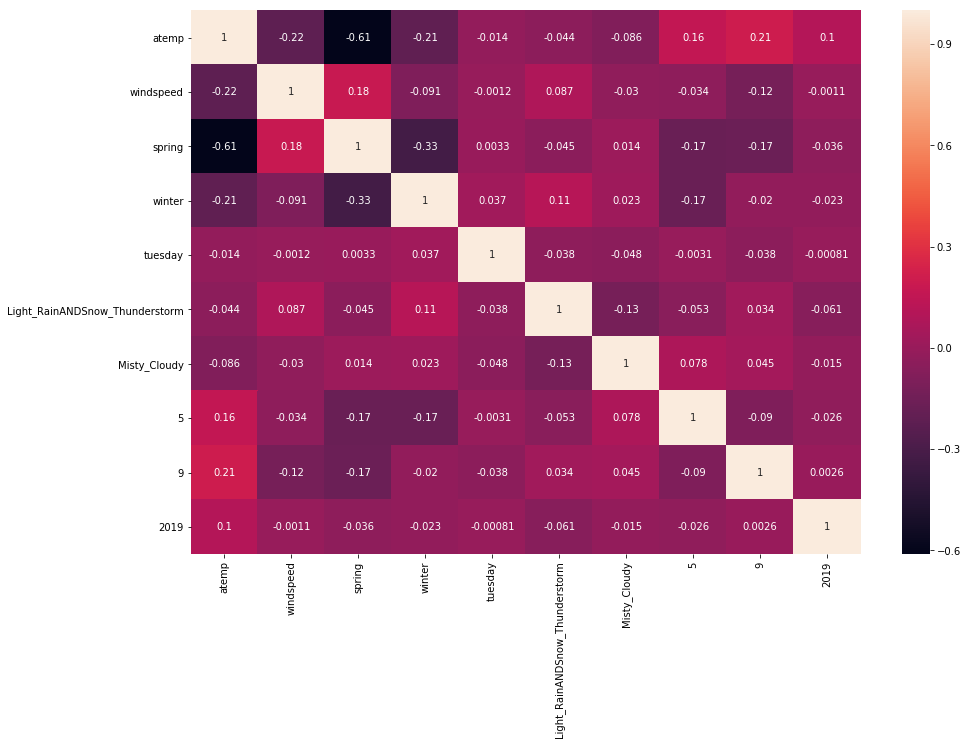

In [68]:
#Lets check the correlations using a heatmap

plt.figure(figsize = (15, 10))
sns.heatmap(X_train_rfe.corr(), annot = True)
plt.show()

#### Observation: From the above plots we see that there is no multicollinearity between the featues and the error terms are normally distributed hence answers to the assumptions of Linear Regression

In [69]:
#Applying scaling on test set

#Instantiate an object
scaler=MinMaxScaler()

#Create list of numeric varibales
num_vars = ['atemp','hum','windspeed','cnt']

#Fit scaler on data
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

D:\Deepika\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Deepika\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [70]:
#Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
X_train_rfe_5.head()

,const,atemp,windspeed,spring,winter,tuesday,Light_RainANDSnow_Thunderstorm,Misty_Cloudy,5,9,2019
653,1.0,0.501133,0.300794,0,1,0,0,0,0,0,1
576,1.0,0.766351,0.264686,0,0,0,0,0,0,0,1
426,1.0,0.438975,0.255342,1,0,0,0,1,0,0,1
728,1.0,0.200348,0.663106,1,0,1,0,0,0,0,1
482,1.0,0.391735,0.188475,0,0,0,0,1,0,0,1


In [72]:
print(X_train_rfe_5.columns)

Index([                         'const',                          'atemp',
                            'windspeed',                         'spring',
                               'winter',                        'tuesday',
       'Light_RainANDSnow_Thunderstorm',                   'Misty_Cloudy',
                                      5,                                9,
                                   2019],
      dtype='object')


In [73]:
X_train_new=X_train_rfe_5.drop(['const'], axis=1)

In [74]:
# Using the model lets predict for test set

# Creating X_test_new df by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [75]:
#Prediction

y_pred = lm_6.predict(X_test_new)

Text(0,0.5,'y_pred')

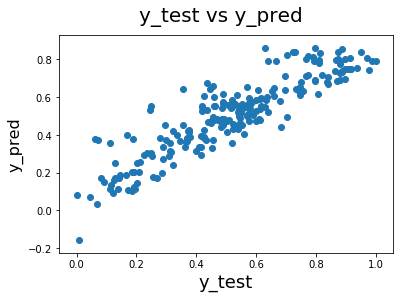

In [76]:
#Model evaluation

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                           
plt.ylabel('y_pred', fontsize=16) 

#### Observation: From the above plot we see that the actual count and predicted count are almost similar. 

In [77]:
from sklearn.metrics import r2_score

In [78]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.799767384595257

In [79]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     240.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.71e-183
Time:                        18:59:15   Log-Likelihood:                 487.21
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     499   BIC:                            -905.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### From the above table we can build the linear equation as below

cnt= 0.4292\*atemp - 0.1224\*windspeed - 0.1151\*spring + 0.0472\*winter - 0.0467\*tuesday - 0.2837\*Light_RainANDSnow_Thunderstorm - -0.0813\*Misty_Cloudy + 0.0368\*5 + 0.0711\*9 + 0.2372\*2019

Q - Which variables are significant in predicting the demand for shared bikes?
#### The variable that are significant in predicting the demand for bikes are atemp, 2019, 9, winter, 5, windspeed, spring,tuesday,Light_RainANDSnow_Thunderstorm,Misty_Cloudy

Q - How well those variables describe the bike demands?
1. Demands increases when atemp is higher
2. Demands increases in the month of 5, 9 and in 2019
3. Demands increase in winter
4. Demand decreases in spring, tuesday, when the weather is Light_RainANDSnow_Thunderstorm or Misty_Cloudy